In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def resampling(d: float, l: int, m: int, num: int, fs: int = 1, n: int = 15):
        coef = l / m
        fy = fs / coef
        xs = np.arange(1, n, fs)
        s = np.exp(np.cos(xs))
        xy = np.arange(1, n, fy) - d
        y = np.exp(np.cos(xy))
        plt.subplot(5, 1, num)
        fy_text = f'Fy = {round(coef, 2)} * Fs' if coef != 1 else 'Fy = Fs'
        plt.title(f'Case {num}: x0 = {d}, {fy_text}')
        plt.stem(xy, y, 'g', markerfmt='go', label='y')
        plt.stem(xs, s, 'b', markerfmt='bo', label='s')
        plt.xlim([1, n - 1])
        plt.legend()
        plt.grid()

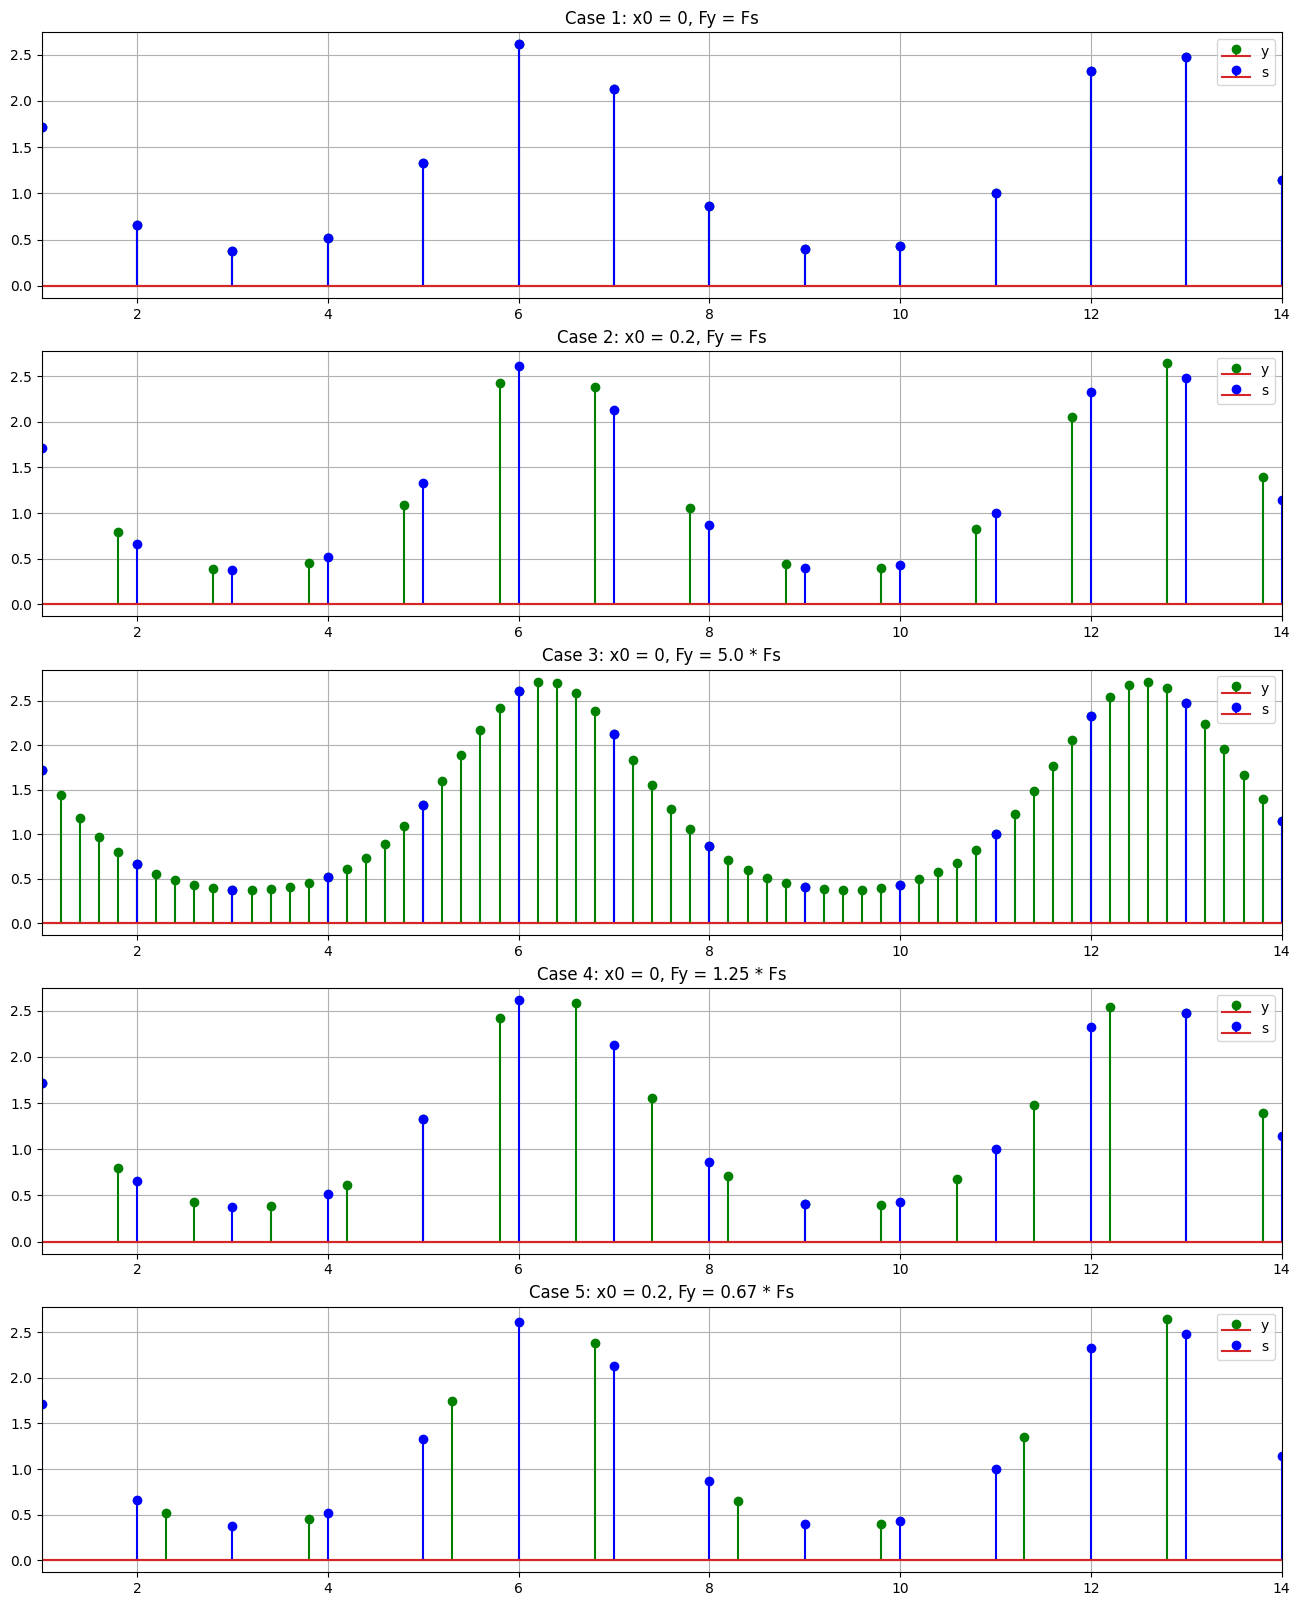

In [ ]:
fig = plt.figure(figsize=(16, 20), dpi=100)

resampling(d=0, l=1, m=1, num=1)
resampling(d=0.2, l=1, m=1, num=2)
resampling(d=0, l=5, m=1, num=3)
resampling(d=0, l=5, m=4, num=4)
resampling(d=0.2, l=2, m=3, num=5)

In [ ]:
from tabulate import tabulate

In [ ]:
def get_output_signal(d: float, s: np.ndarray, l: int, m: int, len_y: int):

    coef = l / m

    xy, y, strings = [], [], []
    for k in range(len_y):
        x_k = k / coef - d
        delta_k = np.floor(x_k) + 1 - x_k
        n = int(np.floor(x_k) + 2) + 2

        a0 = s[n - 1]
        a1 = 1 / 6 * s[n - 3] - s[n - 2] + 0.5 * s[n - 1] + 1 / 3 * s[n]
        a2 = 0.5 * s[n - 2] - s[n - 1] + 0.5 * s[n]
        a3 = -1 / 6 * s[n - 3] + 0.5 * s[n - 2] - 0.5 * s[n - 1] + 1 / 6 * s[n]

        y.append(a0 - a1 * delta_k + a2 * delta_k**2 - a3 * delta_k**3)
        xy.append(x_k)
        strings.append([k, n - 2, x_k, delta_k, s[n - 3], s[n - 2], s[n - 1], s[n], y[-1]])
    return xy, y, strings

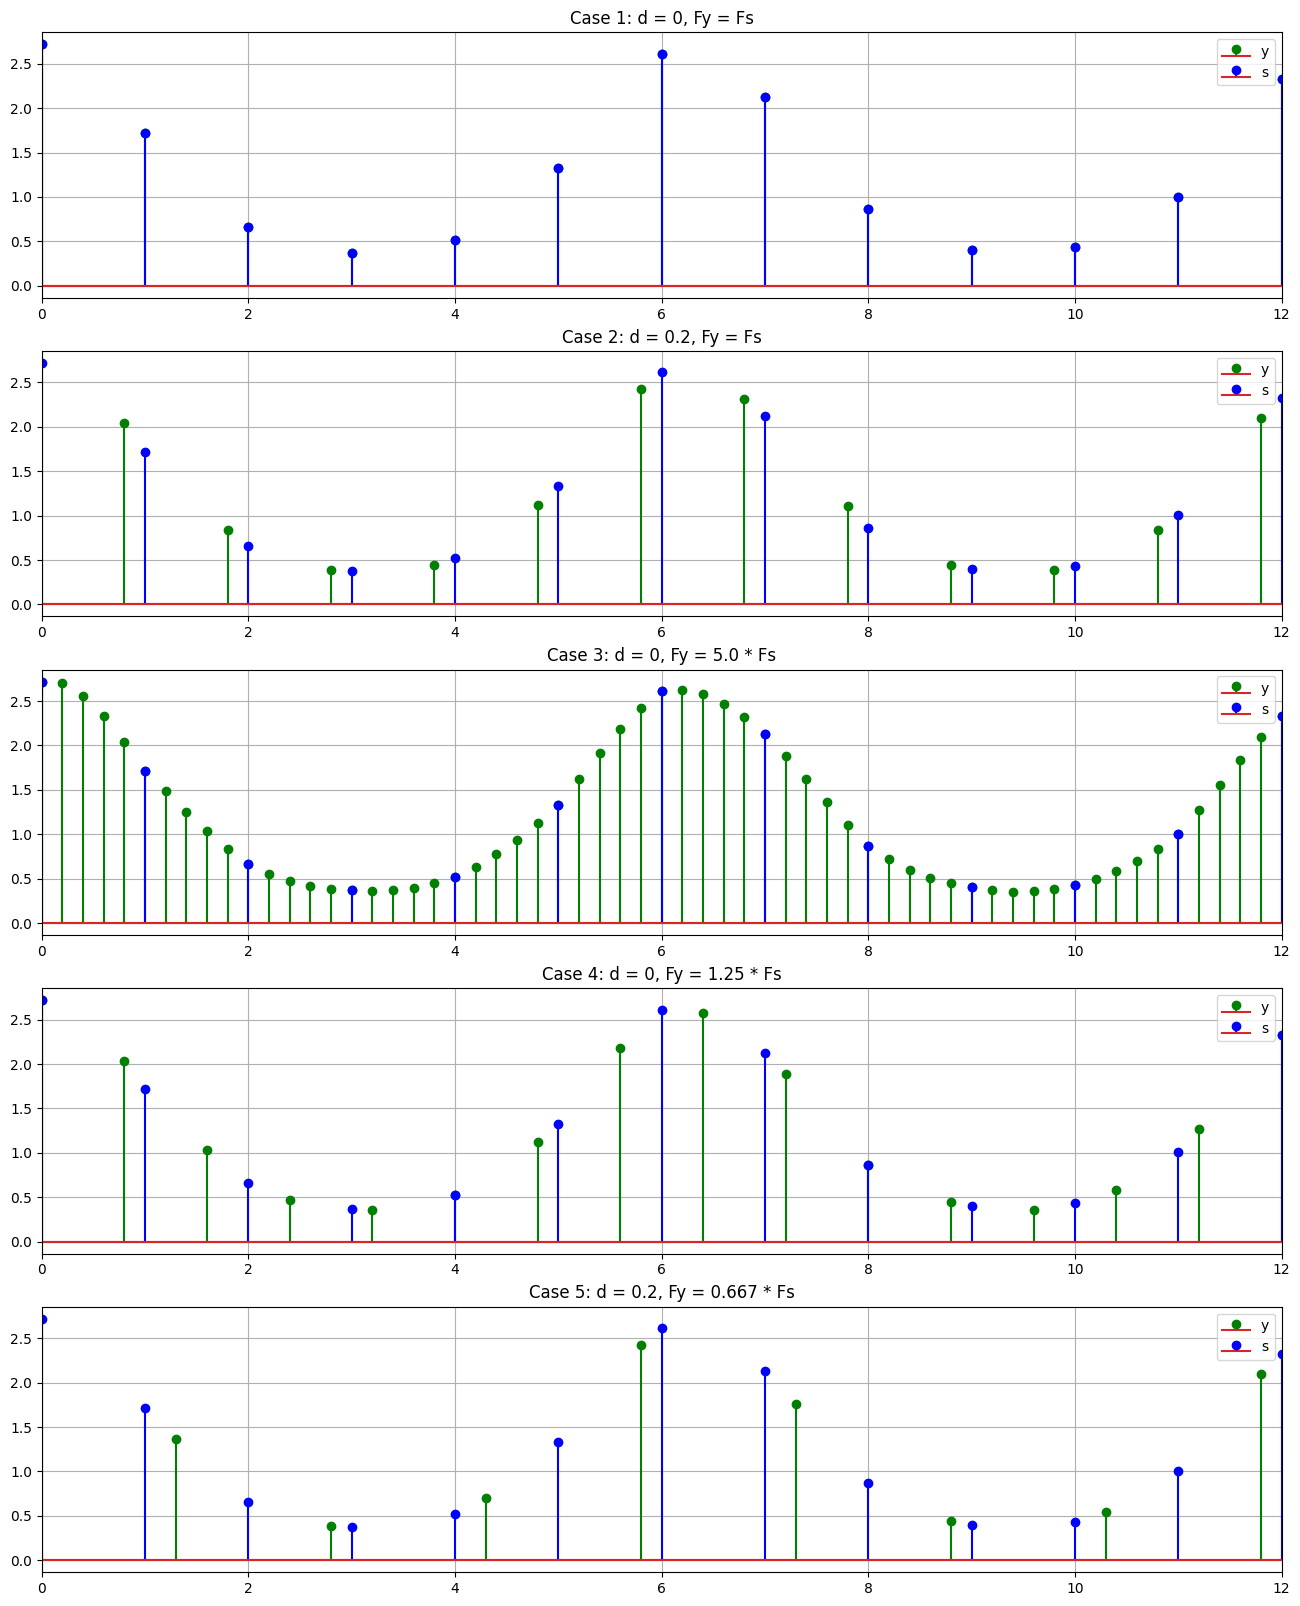

In [ ]:
def farrow_resample(d: float, l: int, m: int, num: int, fs: int = 1, n: int = 15, get_strings: bool = False):

    coef = l / m

    xs = np.arange(0, n, fs)
    s = np.exp(np.cos(xs))
    s_expanded = np.concatenate((np.array([0., 0.]), s, np.array([0., 0.])))

    len_y = int(np.floor(len(s) * coef))
    xy, y, strings = get_output_signal(d, s_expanded, l, m, len_y)

    if get_strings:
        return strings

    plt.subplot(5, 1, num)
    fy_text = f'Fy = {round(coef, 3)} * Fs' if coef != 1 else 'Fy = Fs'
    plt.title(f'Case {num}: d = {d}, {fy_text}')
    plt.stem(xy, y, 'g', markerfmt='go', label='y')
    plt.stem(xs, s, 'b', markerfmt='bo', label='s')
    plt.xlim([0, 12])
    plt.legend()
    plt.grid()

fig = plt.figure(figsize=(16, 20), dpi=100)

farrow_resample(d=0, l=1, m=1, num=1)
farrow_resample(d=0.2, l=1, m=1, num=2)
farrow_resample(d=0, l=5, m=1, num=3)
farrow_resample(d=0, l=5, m=4, num=4)
farrow_resample(d=0.2, l=2, m=3, num=5)

На таблице ниже представлен процесс передискретизации входного сигнала с коэффициентами: $L = 2$, $M = 3$ и $d = 0.2$.

In [ ]:
strings = farrow_resample(d=0.2, l=2, m=3, num=0, get_strings=True)
col_names = ['k', 'n', 'x_k', 'delta_k', 's(n - 3)', 's(n - 2)', 's(n - 1)', 's(n)', 'y(k)']
print(tabulate(strings, headers=col_names, tablefmt='fancy_grid'))

╒═════╤═════╤═══════╤═══════════╤════════════╤════════════╤════════════╤══════════╤══════════╕
│   k │   n │   x_k │   delta_k │   s(n - 3) │   s(n - 2) │   s(n - 1) │     s(n) │     y(k) │
╞═════╪═════╪═══════╪═══════════╪════════════╪════════════╪════════════╪══════════╪══════════╡
│   0 │   1 │  -0.2 │       0.2 │   0        │   0        │   2.71828  │ 1.71653  │ 2.2662   │
├─────┼─────┼───────┼───────────┼────────────┼────────────┼────────────┼──────────┼──────────┤
│   1 │   3 │   1.3 │       0.7 │   2.71828  │   1.71653  │   0.659583 │ 0.371579 │ 1.36774  │
├─────┼─────┼───────┼───────────┼────────────┼────────────┼────────────┼──────────┼──────────┤
│   2 │   4 │   2.8 │       0.2 │   1.71653  │   0.659583 │   0.371579 │ 0.520147 │ 0.383619 │
├─────┼─────┼───────┼───────────┼────────────┼────────────┼────────────┼──────────┼──────────┤
│   3 │   6 │   4.3 │       0.7 │   0.371579 │   0.520147 │   1.32798  │ 2.61214  │ 0.701599 │
├─────┼─────┼───────┼───────────┼────────────┼────